In [75]:
import io
import math
import json
import gzip
import time
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from tqdm.notebook import trange, tqdm

Single String Algorithms

In [17]:
words1 = [
    'Lorem', 'ipsum', 'dolor', 'sit', 'amet', 'consectetur', 'adipiscing', 'elit', 'Pellentesque', 'sodales', 
    'turpis', 'eu', 'fermentum', 'luctus', 'arcu', 'velit', 'pulvinar', 'est', 'eu', 'pellentesque'
    ]
words2 = [
    'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 
    'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana'
    ]

In [18]:
# Entropy

def calculateEntropy(words):
    wordFrequencies = Counter(words)
    total = len(words)

    entropy = -sum((freq / total) * math.log2(freq / total) for freq in wordFrequencies.values())
    return entropy

In [19]:
print(calculateEntropy(words1))
print(calculateEntropy(words2))

4.221928094887362
1.0


In [12]:
# Compression Ratio

def calculateCompressionRatio(words):
    original = ''.join(words).encode('utf-8')
    originalSize = len(original)

    buffer = io.BytesIO()
    with gzip.GzipFile(fileobj=buffer, mode="wb") as f:
        f.write(original)
    
    compressed = buffer.getvalue()
    compressedSize = len(compressed)
    
    return originalSize / compressedSize

In [20]:
print(calculateCompressionRatio(words1))
print(calculateCompressionRatio(words2))

1.1826923076923077
3.0303030303030303


In [82]:
# Most Repeated Substring
# This function looks for the most repeated substring in a string/sentence. A very inefficient function. 

def findMostRepeated(words):
    string = ''.join(words).replace('\n', '')

    if len(string) < 3:
        return 1, ''

    checked = set()
    maxRepetition = 0
    maxSubstring = ''
    
    for i in range(len(string)-1):
        for j in range(i+2, len(string)+1):
            substring = string[i:j]

            if substring not in checked:
                frequency = (len(string.split(substring)) - 1)
                score = (len(string.split(substring)) - 1) * len(substring)
                if score > maxRepetition and frequency > 1:
                    maxRepetition = score
                    maxSubstring = substring
                checked.add(substring)
    
    return maxRepetition, maxSubstring

In [83]:
print(findMostRepeated(words1))
print(findMostRepeated(words2))

(22, 'ellentesque')
(60, 'banana')


In [42]:
# test unit

with open("DataFile1.json", encoding="utf-8") as f:
    data = json.load(f)

df = pd.DataFrame(data)

In [74]:
scores = []

for i in tqdm(range(len(df['content']))):
    scores.append(findMostRepeated(df['content'][i])[0])

  0%|          | 0/5019 [00:00<?, ?it/s]

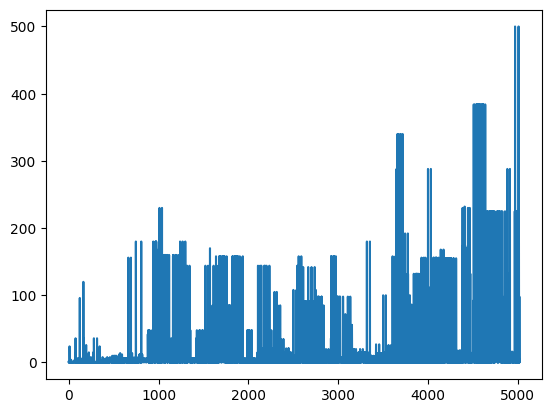

In [76]:
plt.plot(scores)

In [ ]:
Counter(scores)